In [6]:
import json

def read_jsonl_file(path):
    json_lines = []
    with open(path, 'r') as f:
        for line in f:
            json_lines.append(json.loads(line.strip()))
    return json_lines

matches = read_jsonl_file('aml_5525-main/dataset/processed/team_ids_player_idssss.json')

In [7]:
import random

random.shuffle

club_ids = [23, 4, 3, 40, 1, 7, 25, 27, 12, 31, 21, 33, 11, 39, 13, 2, 34, 37, 18, 10, 29, 26, 5, 19, 22, 28, 15, 9, 20, 42, 127, 45, 36, 6, 14, 17, 8, 35, 16, 24, 38, 43, 131, 32, 159, 46, 41, 130, 44, 30]
season_match = {'2012-13':[],'2013-14':[],'2014-15':[],'2015-16':[],'2016-17':[],'2017-18':[],'2018-19':[],'2019-20':[],'2020-21':[],'2021-22':[]}
season_no = ['2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20','2020-21','2021-22']

combined_test_set = []
combined_training_set = []

for i in range(len(matches)):
    one_match = matches[i]
    season = one_match['season']
    season_match[season].append(one_match)

for j in season_no:
    test_set = []
    training_set = []
    combined = season_match[j]
    random.shuffle(combined)
    for i in range(len(club_ids)):
        club_id = club_ids[i]
        matched = 1
        for match in combined:
            home_id = match['home_id']
            if club_id == home_id and matched < 5:
                test_set.append(match)
                matched = matched + 1
            elif club_id == home_id and matched > 4:
                training_set.append(match)
    print(j,'season','length of test set is',len(test_set))
    print(j,'season','length of training set is',len(training_set))
    combined_test_set.append(test_set)
    combined_training_set.append(training_set)
    
#combined_test_set[0]은 2012-13시즌 test_set이고.....이런 식으로 정리했습니다.

2012-13 season length of test set is 80
2012-13 season length of training set is 300
2013-14 season length of test set is 80
2013-14 season length of training set is 300
2014-15 season length of test set is 80
2014-15 season length of training set is 300
2015-16 season length of test set is 80
2015-16 season length of training set is 300
2016-17 season length of test set is 80
2016-17 season length of training set is 293
2017-18 season length of test set is 80
2017-18 season length of training set is 300
2018-19 season length of test set is 80
2018-19 season length of training set is 300
2019-20 season length of test set is 80
2019-20 season length of training set is 300
2020-21 season length of test set is 80
2020-21 season length of training set is 300
2021-22 season length of test set is 80
2021-22 season length of training set is 300


In [13]:
import json

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, clone
from scipy.stats import uniform
import matplotlib.pyplot as plt

club_ids = [23, 4, 3, 40, 1, 7, 25, 27, 12, 31, 21, 33, 11, 39, 13, 2, 34, 37, 18, 10, 29, 26, 5, 19, 22, 28, 15, 9, 20, 42, 127, 45, 36, 6, 14, 17, 8, 35, 16, 24, 38, 43, 131, 32, 159, 46, 41, 130, 44, 30]
club_ratings = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

def read_jsonl_file(path):
    json_lines = []
    with open(path, 'r') as f:
        for line in f:
            json_lines.append(json.loads(line.strip()))
    return json_lines


def flatten_list_of_lists(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]


class JuilELO(BaseEstimator):
    def __init__(self, threshold):
        super(JuilELO, self).__init__()
        self.threshold = threshold
        
    def fit(self,X_train,y_train):
        c = 10
        d = 400
        k = 1
        ids = club_ids
        ratings = club_ratings
        threshold = self.threshold
        for i in range(len(y_train)):
            home_index = ids.index(X_train[i][0])
            home_rating = ratings[home_index]
            away_index = ids.index(X_train[i][1])
            away_rating = ratings[away_index]
            home_prediction = 1/(1+c**((away_rating - home_rating)/d))
            away_prediction = 1 - home_prediction
            real_result = y_train[i]
            home_rating = home_rating + k*(real_result - home_prediction)
            away_rating = away_rating + k*(real_result - away_prediction)
            ratings[home_index] = home_rating
            ratings[away_index] = away_rating
        prediction = []
        for i in range(len(X_train)):
            home_index = ids.index(X_train[i][0])
            home_rating = ratings[home_index]
            away_index = ids.index(X_train[i][1])
            away_rating = ratings[away_index]
            home_prediction = 1/(1+c**((away_rating - home_rating)/d))
            away_prediction = 1 - home_prediction
            if home_prediction - away_prediction > threshold:
                prediction.append(2)
            elif abs(home_prediction - away_prediction) <= threshold:
                prediction.append(1)
            else:
                prediction.append(0)
        prediction = np.array(prediction)
        prediction = prediction.reshape(-1,1)
        self.ratings = ratings
        return ratings, prediction

    def predict(self,X_test):
        c = 10
        d = 400
        ids = club_ids
        threshold = self.threshold
        prediction = []
        ratings = self.ratings
        for i in range(len(X_test)):
            home_index = ids.index(X_test[i][0])
            home_rating = ratings[home_index]
            away_index = ids.index(X_test[i][1])
            away_rating = ratings[away_index]
            home_prediction = 1/(1+c**((away_rating - home_rating)/d))
            away_prediction = 1 - home_prediction
            prediction.append(home_prediction - away_prediction)
        prediction = np.array(prediction)
        prediction = prediction.reshape(-1,1)
        return prediction

class MyOneHot:
    def __init__(self, categories):
        self.categories = sorted(categories)
        self.ind2cat = {ind: cat for ind, cat in enumerate(self.categories)}
        self.cat2ind = {cat: ind for ind, cat in self.ind2cat.items()}
        self.vector_size = len(self.categories)
        self.one_hot_vectors = []
        for ind, cat in self.ind2cat.items():
            v = np.zeros(self.vector_size, dtype=int)
            v[ind] = 1
            self.one_hot_vectors.append(v)

    def __call__(self, category):
        return self.one_hot_vectors[self.cat2ind[category]]
    
def do_exp_1():
    X = []
    y = []

    for match in new_match:

        list_home_id = []
        list_away_id = []
        
        list_home_id.append(match['home_id'])
        list_away_id.append(match['away_id'])
                
        x = np.array(list_home_id + list_away_id)  
        X.append(x)
        y.append(int(match['match_result']))

    X = np.asarray(X)
    y = np.asarray(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    model = JuilELO(threshold = 0.1)
    distributions = dict(threshold=uniform(loc=0, scale=1))
    clf = RandomizedSearchCV(model, distributions, random_state= 42,scoring = 'r2')
    search = clf.fit(X_train,y_train)
    thres = search.best_params_['threshold']
    prediction = search.predict(X_test)
    predd = []
    for i in range(len(prediction)):
        if prediction[i] > thres:
            predd.append(2)
        elif abs(prediction[i]) < thres:
            predd.append(1)
        else:
            predd.append(0)
    error = 0
    for i in range(len(predd)):
        if predd[i] != y_test[i]:
            error = error + 1
    error_rate = error/len(predd)
    accuracy = (1 - error_rate) * 100
    print('Accuracy Rate: ',accuracy)
    pd.set_option('display.float_format',  '{:.2f}'.format)
    results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()
    print(results)
    print(thres)
    
    
def do_exp_2():
    season_no = []
    Acc = []
    threshold = []
    for i in range(len(combined_training_set)):
        training_set = combined_training_set[i]
        test_set = combined_test_set[i]
        season = training_set[i]['season']
        print(season,'length of training set is',len(training_set))
        print(season,'length of test set is',len(test_set))
        X_training = []
        y_training = []

        for match in training_set:

            list_home_id = []
            list_away_id = []

            list_home_id.append(match['home_id'])
            list_away_id.append(match['away_id'])

            x = np.array(list_home_id + list_away_id)  
            X_training.append(x)
            y_training.append(int(match['match_result']))

        X_training = np.asarray(X_training)
        y_training = np.asarray(y_training)

        X_test = []
        y_test = []

        for match in test_set:

            list_home_id = []
            list_away_id = []

            list_home_id.append(match['home_id'])
            list_away_id.append(match['away_id'])

            x = np.array(list_home_id + list_away_id)  
            X_test.append(x)
            y_test.append(int(match['match_result']))

        X_test = np.asarray(X_test)
        y_test = np.asarray(y_test)

        model = JuilELO(threshold = 0.1)
        distributions = dict(threshold=uniform(loc=0, scale=1))
        clf = RandomizedSearchCV(model, distributions, random_state= 42,scoring = 'r2')
        search = clf.fit(X_training,y_training)
        thres = search.best_params_['threshold']
        prediction = search.predict(X_test)
        predd = []
        for i in range(len(prediction)):
            if prediction[i] > thres:
                predd.append(2)
            elif abs(prediction[i]) < thres:
                predd.append(1)
            else:
                predd.append(0)
        error = 0
        for i in range(len(predd)):
            if predd[i] != y_test[i]:
                error = error + 1
        error_rate = error/len(predd)
        accuracy = (1 - error_rate) * 100
        print(season,'threshold: ',thres)
        season_no.append(season)
        Acc.append(accuracy)
        threshold.append(thres)
        pd.set_option('display.float_format',  '{:.2f}'.format)
        results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()
        print(results)
    plt.figure(1)
    plt.plot(season_no,Acc)
    plt.ylabel('Accuracy [in %]')
    plt.xlabel('Season')
    plt.figure(2)
    plt.plot(season_no,threshold)
    plt.ylabel('Threshold')
    plt.xlabel('Season')
    plt.show()
    

In [9]:
matches = read_jsonl_file('aml_5525-main/dataset/processed/team_ids_player_idssss.json')

In [10]:
list_matches_correct = []
count = 0

for i in range(len(matches)):
    
    if int(matches[i]['season'][:4]) > 2011:
        
        list_matches_correct.append(count)
    
    count += 1

new_match = []

for i in list_matches_correct:
    new_match.append(matches[i])

In [11]:
do_exp_1()

(3034, 2) (3034,)
(759, 2) (759,)
Accuracy Rate:  42.29249011857708
\begin{tabular}{lrrrrrr}
\toprule
{} &      0 &      1 &      2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &   0.48 &   0.25 &   0.59 &      0.42 &       0.44 &          0.48 \\
recall    &   0.45 &   0.43 &   0.40 &      0.42 &       0.43 &          0.42 \\
f1-score  &   0.46 &   0.32 &   0.48 &      0.42 &       0.42 &          0.44 \\
support   & 233.00 & 179.00 & 347.00 &      0.42 &     759.00 &        759.00 \\
\bottomrule
\end{tabular}

0.3745401188473625


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:148: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2012-13 length of training set is 300
2012-13 length of test set is 80
2012-13 threshold:  0.3745401188473625
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.25 &  0.30 &  0.30 &      0.30 &       0.28 &          0.28 \\
recall    &  0.04 &  0.80 &  0.11 &      0.30 &       0.32 &          0.30 \\
f1-score  &  0.06 &  0.44 &  0.16 &      0.30 &       0.22 &          0.21 \\
support   & 28.00 & 25.00 & 27.00 &      0.30 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2013-14 length of training set is 300
2013-14 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2013-14 threshold:  0.7080725777960455
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.40 &  0.15 &  1.00 &      0.21 &       0.52 &          0.70 \\
recall    &  0.08 &  1.00 &  0.09 &      0.21 &       0.39 &          0.21 \\
f1-score  &  0.13 &  0.27 &  0.17 &      0.21 &       0.19 &          0.17 \\
support   & 25.00 & 11.00 & 44.00 &      0.21 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2014-15 length of training set is 300
2014-15 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2014-15 threshold:  0.3745401188473625
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.32 &  0.32 &  0.60 &      0.42 &       0.41 &          0.45 \\
recall    &  0.44 &  0.31 &  0.50 &      0.42 &       0.42 &          0.42 \\
f1-score  &  0.37 &  0.31 &  0.55 &      0.42 &       0.41 &          0.43 \\
support   & 18.00 & 26.00 & 36.00 &      0.42 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2015-16 length of training set is 300
2015-16 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2015-16 threshold:  0.7080725777960455
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.62 &  0.24 &  0.43 &      0.31 &       0.43 &          0.47 \\
recall    &  0.15 &  0.82 &  0.20 &      0.31 &       0.39 &          0.31 \\
f1-score  &  0.24 &  0.37 &  0.27 &      0.31 &       0.30 &          0.28 \\
support   & 33.00 & 17.00 & 30.00 &      0.31 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2016-17 length of training set is 293
2016-17 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2016-17 threshold:  0.7080725777960455
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.25 &  0.30 &  0.56 &      0.34 &       0.37 &          0.42 \\
recall    &  0.29 &  0.57 &  0.23 &      0.34 &       0.36 &          0.34 \\
f1-score  &  0.27 &  0.39 &  0.32 &      0.34 &       0.33 &          0.33 \\
support   & 17.00 & 23.00 & 40.00 &      0.34 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2017-18 length of training set is 300
2017-18 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2017-18 threshold:  0.6011150117432088
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.67 &  0.22 &  0.33 &      0.31 &       0.41 &          0.45 \\
recall    &  0.24 &  0.52 &  0.24 &      0.31 &       0.33 &          0.31 \\
f1-score  &  0.35 &  0.31 &  0.28 &      0.31 &       0.31 &          0.32 \\
support   & 34.00 & 21.00 & 25.00 &      0.31 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2018-19 length of training set is 300
2018-19 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2018-19 threshold:  0.05808361216819946
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.50 &  1.00 &  0.58 &      0.55 &       0.69 &          0.66 \\
recall    &  0.78 &  0.10 &  0.66 &      0.55 &       0.51 &          0.55 \\
f1-score  &  0.61 &  0.17 &  0.62 &      0.55 &       0.47 &          0.50 \\
support   & 27.00 & 21.00 & 32.00 &      0.55 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2019-20 length of training set is 300
2019-20 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2019-20 threshold:  0.7319939418114051
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.44 &  0.22 &  0.57 &      0.36 &       0.41 &          0.43 \\
recall    &  0.35 &  0.38 &  0.36 &      0.36 &       0.36 &          0.36 \\
f1-score  &  0.39 &  0.28 &  0.44 &      0.36 &       0.37 &          0.38 \\
support   & 23.00 & 24.00 & 33.00 &      0.36 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2020-21 length of training set is 300
2020-21 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2020-21 threshold:  0.5986584841970366
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.72 &  0.19 &  0.57 &      0.46 &       0.49 &          0.58 \\
recall    &  0.50 &  0.50 &  0.41 &      0.46 &       0.47 &          0.46 \\
f1-score  &  0.59 &  0.27 &  0.47 &      0.46 &       0.45 &          0.50 \\
support   & 36.00 & 12.00 & 32.00 &      0.46 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}

2021-22 length of training set is 300
2021-22 length of test set is 80


/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


2021-22 threshold:  0.3745401188473625
\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &     1 &     2 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.59 &  0.28 &  0.54 &      0.46 &       0.47 &          0.50 \\
recall    &  0.59 &  0.47 &  0.36 &      0.46 &       0.47 &          0.46 \\
f1-score  &  0.59 &  0.35 &  0.43 &      0.46 &       0.46 &          0.47 \\
support   & 27.00 & 17.00 & 36.00 &      0.46 &      80.00 &         80.00 \\
\bottomrule
\end{tabular}



/var/folders/_w/_1pj9jsj1wb68x732tzxywym0000gn/T/ipykernel_57122/1718682273.py:224: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results = pd.DataFrame(metrics.classification_report(y_test, predd, output_dict=True)).to_latex()


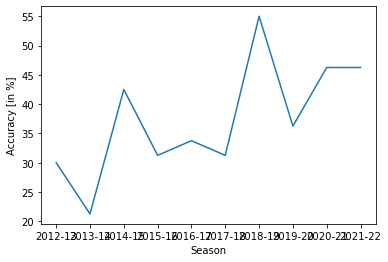

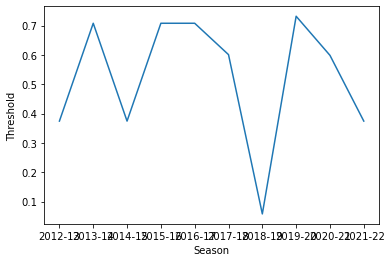

In [14]:
do_exp_2()